In [2]:
!pwd

/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/test


In [1]:
%cd /home/giakhang/dev/multi_task_autopilot/YOLOF-Mask

/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask


In [10]:
import cv2
import matplotlib.pyplot as plt

from detectron2.config import LazyConfig
from detectron2.checkpoint import DetectionCheckpointer

from yolof_mask.engine.default_predictor import DefaultPredictor
from yolof_mask.utils.visualizer import Visualizer, ColorMode

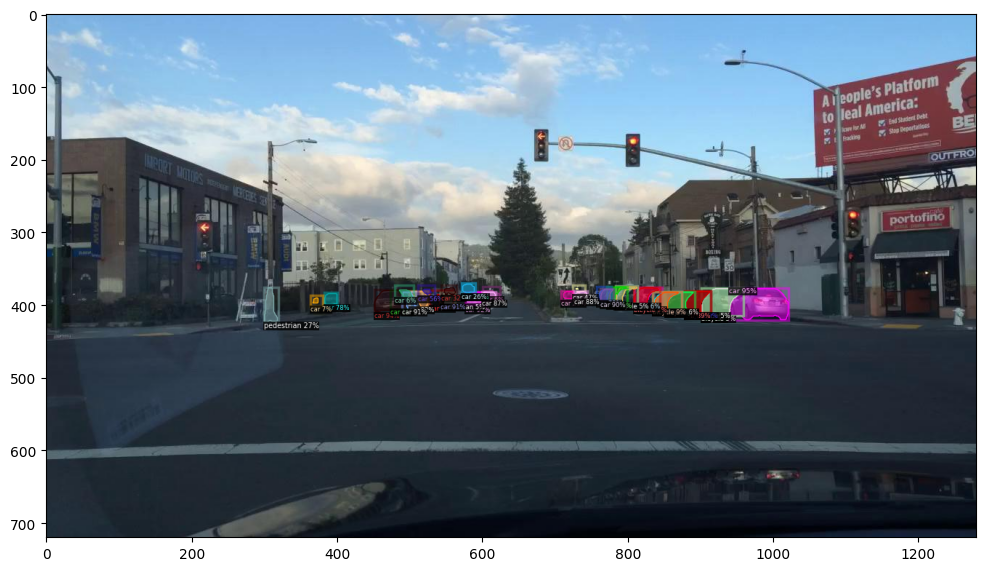

In [13]:
config_path = '/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/configs/InstanceSegmentation/yolof_mask_RegNetX_4gf_3x.py'
cfg = LazyConfig.load(config_path)
cfg.train.device = "cuda:0"
cfg.train.init_checkpoint = "/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/output/yolof_mask_RegNetX_4gf_3x/model_best.pth"

predictor = DefaultPredictor(cfg)

img = cv2.imread("/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/test/data/bdd100k/acaaf824-00000000.jpg")
predictions = predictor(img)

# Currently, we just support for bdd100k
dataset_name = "bdd100k"
if dataset_name == "bdd100k":
    class_names = ["pedestrian", "rider", "car", "truck", "bus", "train", "motorcycle", "bicycle"]
v = Visualizer(img, class_names=class_names)
out = v.draw_instance_predictions(predictions["instances"].to("cpu"))
img_result = out.get_image()[..., ::-1]

_ = plt.figure(figsize=(12, 10))
plt.imshow(img_result)